In [4]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

0.0

X :  [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
------------------------------------------------------------
Y :  [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


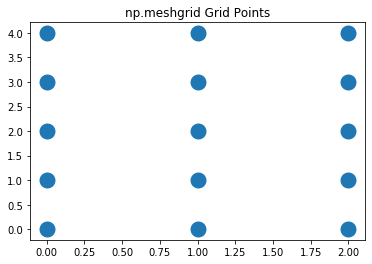

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(3)
x

y = np.arange(5)
y

X, Y = np.meshgrid(x, y)

print("X : ",X)
print("---"*20)
print("Y : ",Y)

[list(zip(x,y)) for x,y in zip(X,Y)]

plt.title("np.meshgrid Grid Points")
plt.scatter(X, Y, linewidths=10)
plt.show()

In [24]:
import numpy as np

y=np.array([1,0,0,1,0])

print(y.T)

print(type(y))

print(np.unique(y))


[1 0 0 1 0]
<class 'numpy.ndarray'>
[0 1]
